# Статистика, DS-поток
## Задание SP.10

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание.**

Практика:
* Задача P1 &mdash; 20 баллов;
* Задача P2 &mdash; 30 баллов;
* Задача P3 &mdash; 90 баллов;
* Задача P4 &mdash; 100 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P1-P3;
* *средняя:* задача P4.

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [1]:
# Bot check

# HW_ID: ds_sp10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from statsmodels.stats.multitest import multipletests
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

_____
### Задача P1. 20 баллов
Были проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.




|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|




Проведите сравнение каждого препарата по эффективности по отношению к плацебо. Какие ответы можно получить для методов, контролирующих FWER и FDR? В каждом случае приведите скорректированные p-value.

*Замечание.* Используйте [`multipletests`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html) из библиотеки `statsmodels`.

**Решение:**

Гипотезы строим так: считаем, что выборка из $Be(p)$:

$$H_0: p \geq \hat p$$
$$H_1: p < \hat p$$

где $\hat p$ - оценка параметра $p$ из группы с плацебо. Посчитаем эту оценку $p$ и учитывая ширину ДИ уровня доверия 95% (и желаемый эффект, хотим улучшение хотя бы в 10%) для нее определим MDE:

In [3]:
data = {
    "Group": ["Плацебо", "Хлорпромазин", "Дименгидринат",
              "Пентобарбитал (100 мг)", "Пентобарбитал (150 мг)"],
    "Patients": [80, 75, 85, 67, 85],
    "Bad": [45, 26, 52, 35, 37],
}

n_control = data["Patients"][0]
nausea_control = data["Bad"][0]

p_control = nausea_control / n_control

alpha = 0.05
z_alpha = sps.norm.ppf(1 - alpha / 2)
diff = round(z_alpha * np.sqrt(p_control * (1 - p_control) / n_control), 2)
(p_control, diff)

(0.5625, 0.11)

Поэтому кладем $MDE = 0.1$. Осталось посчитать p_value из binom_test и провести множественную проверку гипотез

In [4]:
binom_p_values = []

for i in range(1, len(data["Group"])):
    n = data["Patients"][i]
    bad_cnt = data["Bad"][i]
    p_val_binom = sps.binomtest(bad_cnt, n, p_control,
                             alternative="less").pvalue
    binom_p_values.append(p_val_binom)

МПГ:

In [5]:
methods = ["bonferroni", "fdr_bh", "fdr_by"]

results = {method: multipletests(binom_p_values, method=method) for method in methods}

Итого

In [6]:
results_table = pd.DataFrame({
    "Группа": data["Group"][1:],
    "Оценка p": np.round(np.array(data["Bad"][1:]) / np.array(data["Patients"][1:]), 4),
    "Контроль p": p_control,
    "Исходное p-value": binom_p_values,
    "Бонферрони (контроль FWER)": results["bonferroni"][1],
    "Бенджамин-Хохберг (контроль FDR)": results["fdr_bh"][1],
    "Бенджамин-Иекутели (контроль FDR)": results["fdr_by"][1],
    #"Значимость (Бонферрони)": results["bonferroni"][0],
    #"Значимость (FDR)": results["fdr_bh"][0]
})

results_table

,Группа,Оценка p,Контроль p,Исходное p-value,Бонферрони (контроль FWER),Бенджамин-Хохберг (контроль FDR),Бенджамин-Иекутели (контроль FDR)
0,Хлорпромазин,0.3467,0.5625,0.000135,0.000541,0.000541,0.001127
1,Дименгидринат,0.6118,0.5625,0.847363,1.000000,0.847363,1.000000
2,Пентобарбитал (100 мг),0.5224,0.5625,0.293943,1.000000,0.391924,0.816509
3,Пентобарбитал (150 мг),0.4353,0.5625,0.012374,0.049497,0.024749,0.051559


И значимость

In [7]:
pd.DataFrame({
    "Группа": data["Group"][1:],
    "Оценка p": np.round(np.array(data["Bad"][1:]) / np.array(data["Patients"][1:]), 4),
    "Контроль p": p_control,
    "Разница p": np.round(np.array(data["Bad"][1:]) / np.array(data["Patients"][1:]) - p_control, 2),
    r"MDE, $\Delta p$": 0.1,
    "Значимость (Бонф)": results["bonferroni"][1] <= alpha,
    "Значимость (Б-Х)": results["fdr_bh"][1] <= alpha,
    "Значимость (Б-И)": results["fdr_by"][1] <= alpha,
})

,Группа,Оценка p,Контроль p,Разница p,"MDE, $\Delta p$",Значимость (Бонф),Значимость (Б-Х),Значимость (Б-И)
0,Хлорпромазин,0.3467,0.5625,-0.22,0.1,True,True,True
1,Дименгидринат,0.6118,0.5625,0.05,0.1,False,False,False
2,Пентобарбитал (100 мг),0.5224,0.5625,-0.04,0.1,False,False,False
3,Пентобарбитал (150 мг),0.4353,0.5625,-0.13,0.1,True,True,False


**Вывод:** 
Хлорпромазин самый эффективный из препаратов: у него статистически значимый эффект при любом методе МПГ, и сильно преодолевает порог MDE. Пентобарбитал в дозе 150 мг: стат значимость отсутствует только при методе Бенджамина-Иукетели, при этом порог MDE преодолевается.

Дименгидринат и Пентобарбитал (100 мг) не имеют статистически значимых результатов

Итого по задаче: можно применять методы МПГ для проверки сразу нескольких гипотез и избежать ложных "прокрасов"; подбирать методы можно для контроля FDR или FWER

Для медицины лучше подходят методы, контролирующие FWER - мы должны минимизировать возможность ложного одобрения лекарства

_____
### Задача P2. 20 баллов

Пусть $X_1, ..., X_n \sim Bern(p)$.
Известно, что $S_n = \left\{\sum_{i=1}^n x_i > c_{n,\alpha}\right\}$ является равномерно наиболее мощным критерием для проверки $\mathsf{H}_0\colon p=1/2\ vs.\ \mathsf{H}_1\colon p>1/2$, где $\alpha$ &mdash; уровень значимости.

Некоторая компания решила воспользоваться этим критерием для решения одной своей задачи. Например, это может быть исследование конверсии в клик, заполнении формы, указания номера телефона, и тд. Конверсия &mdash; доля пользователей, которая совершит определенное целевое действие.

Данные приходят онлайн, но не так часто. Для простоты задачи будем считать, что данные приходят по одному наблюдению в сутки. Однако, маркетологи не хотят долго ждать, и решают проверять гипотезу каждый день с помощью имеющихся на текущий момент данных.
То есть в $k$-й день они пользуются критерием $S_k$, имея выборку $X_1, ..., X_k$.
Если же в один из дней соответствующий критерий дает положительный результат (т.е. отклоняет $\mathsf{H}_0$), то маркетологи завершают наблюдения, иначе &mdash; продолжают тестирование.

Промоделируйте подобную процедуру в течение 100 дней в предположении справедливости $\mathsf{H}_0$.

In [8]:
alpha = 0.05
max_days = 100
critical_values = [sps.binom.ppf(1 - alpha, k, 0.5) for k in range(1, max_days + 1)]

data = np.random.binomial(1, 0.5, max_days)
cumulative_sums = np.cumsum(data)

rejection_day = None
for n in range(1, max_days + 1):
    if cumulative_sums[n - 1] > critical_values[n - 1]:
        rejection_day = n
        break
        
if rejection_day:
    print(f"Гипотеза была отвергнута на {rejection_day} дне")
else:
    print("Гипотеза не была отвергнута")

Гипотеза была отвергнута на 40 дне


Повторите данный эксперимент достаточное количество раз и по результатам оцените вероятность ошибки I рода в случае если компания проводит эксперимент не более $n$ дней. Постройте ее график в зависимости от $n$.

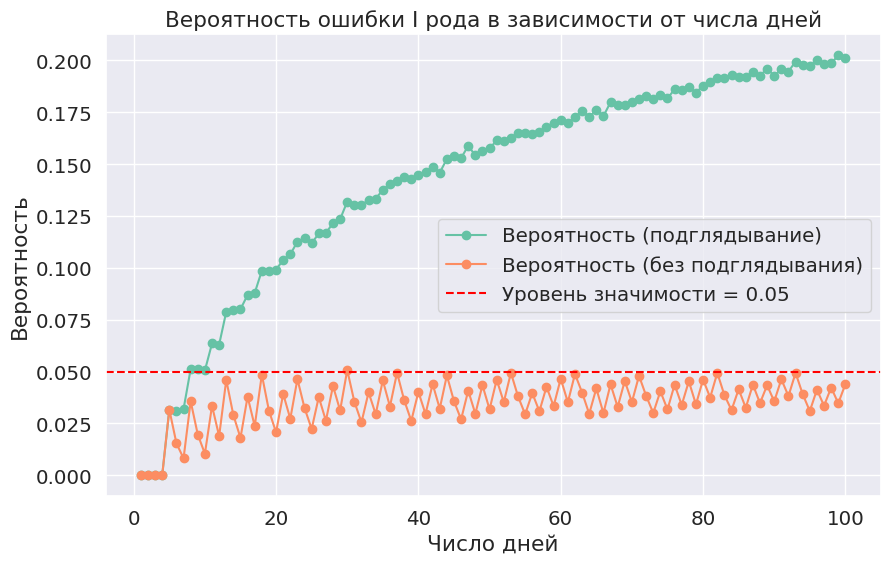

In [9]:
num_experiments = 100000

probabilities_bad = []
probabilities_good = []

for n in range(1, max_days + 1):
    data = np.random.binomial(1, 0.5, (num_experiments, n))
    cumulative_sums = np.cumsum(data, axis=1)
    rejections_bad = np.any(cumulative_sums[:, :n] > critical_values[:n], axis=1)
    rejections_good = cumulative_sums[:, -1] > critical_values[n - 1]
    probabilities_bad.append(np.mean(rejections_bad))
    probabilities_good.append(np.mean(rejections_good))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_days + 1), probabilities_bad, marker='o',
         label="Вероятность (подглядывание)")
plt.plot(range(1, max_days + 1), probabilities_good, marker='o',
         label="Вероятность (без подглядывания)")
plt.axhline(y=alpha, color='r', linestyle='--',
            label=f"Уровень значимости = {alpha}")
plt.title("Вероятность ошибки I рода в зависимости от числа дней")
plt.xlabel("Число дней")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)
plt.show()

Сделайте выводы

Если мы подглядываем, то вероятность отклонить нулевую гипотезу будет равна вероятности того, что **хотя бы** в один из дней критерий оказался верным, хотя критерий контролирует вероятность единственного отторжения - поэтому она растет и больше 0.05

*Замечание.* В статистике (в т.ч. в АБ-тестировании) подобный эффект называется *проблемой подглядывания* (peeking problem). Размер выборки для применения критерия должен быть определен заранее, его нельзя как-то сокращать на основе полученных данных, даже если бизнесу очень хочется.

___________
### Задача P3.

*Примечание.* Задача достаточно простая, кода здесь мало. Основное количество баллов дается за ответы на вопросы. Не забывайте также смотреть в ноутбуки с семинаров.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все признаки, кроме `Class`.

In [10]:
from ucimlrepo import fetch_ucirepo 
  
wine = fetch_ucirepo(id=109) 
  
X = wine.data.features 
y = wine.data.targets 

Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

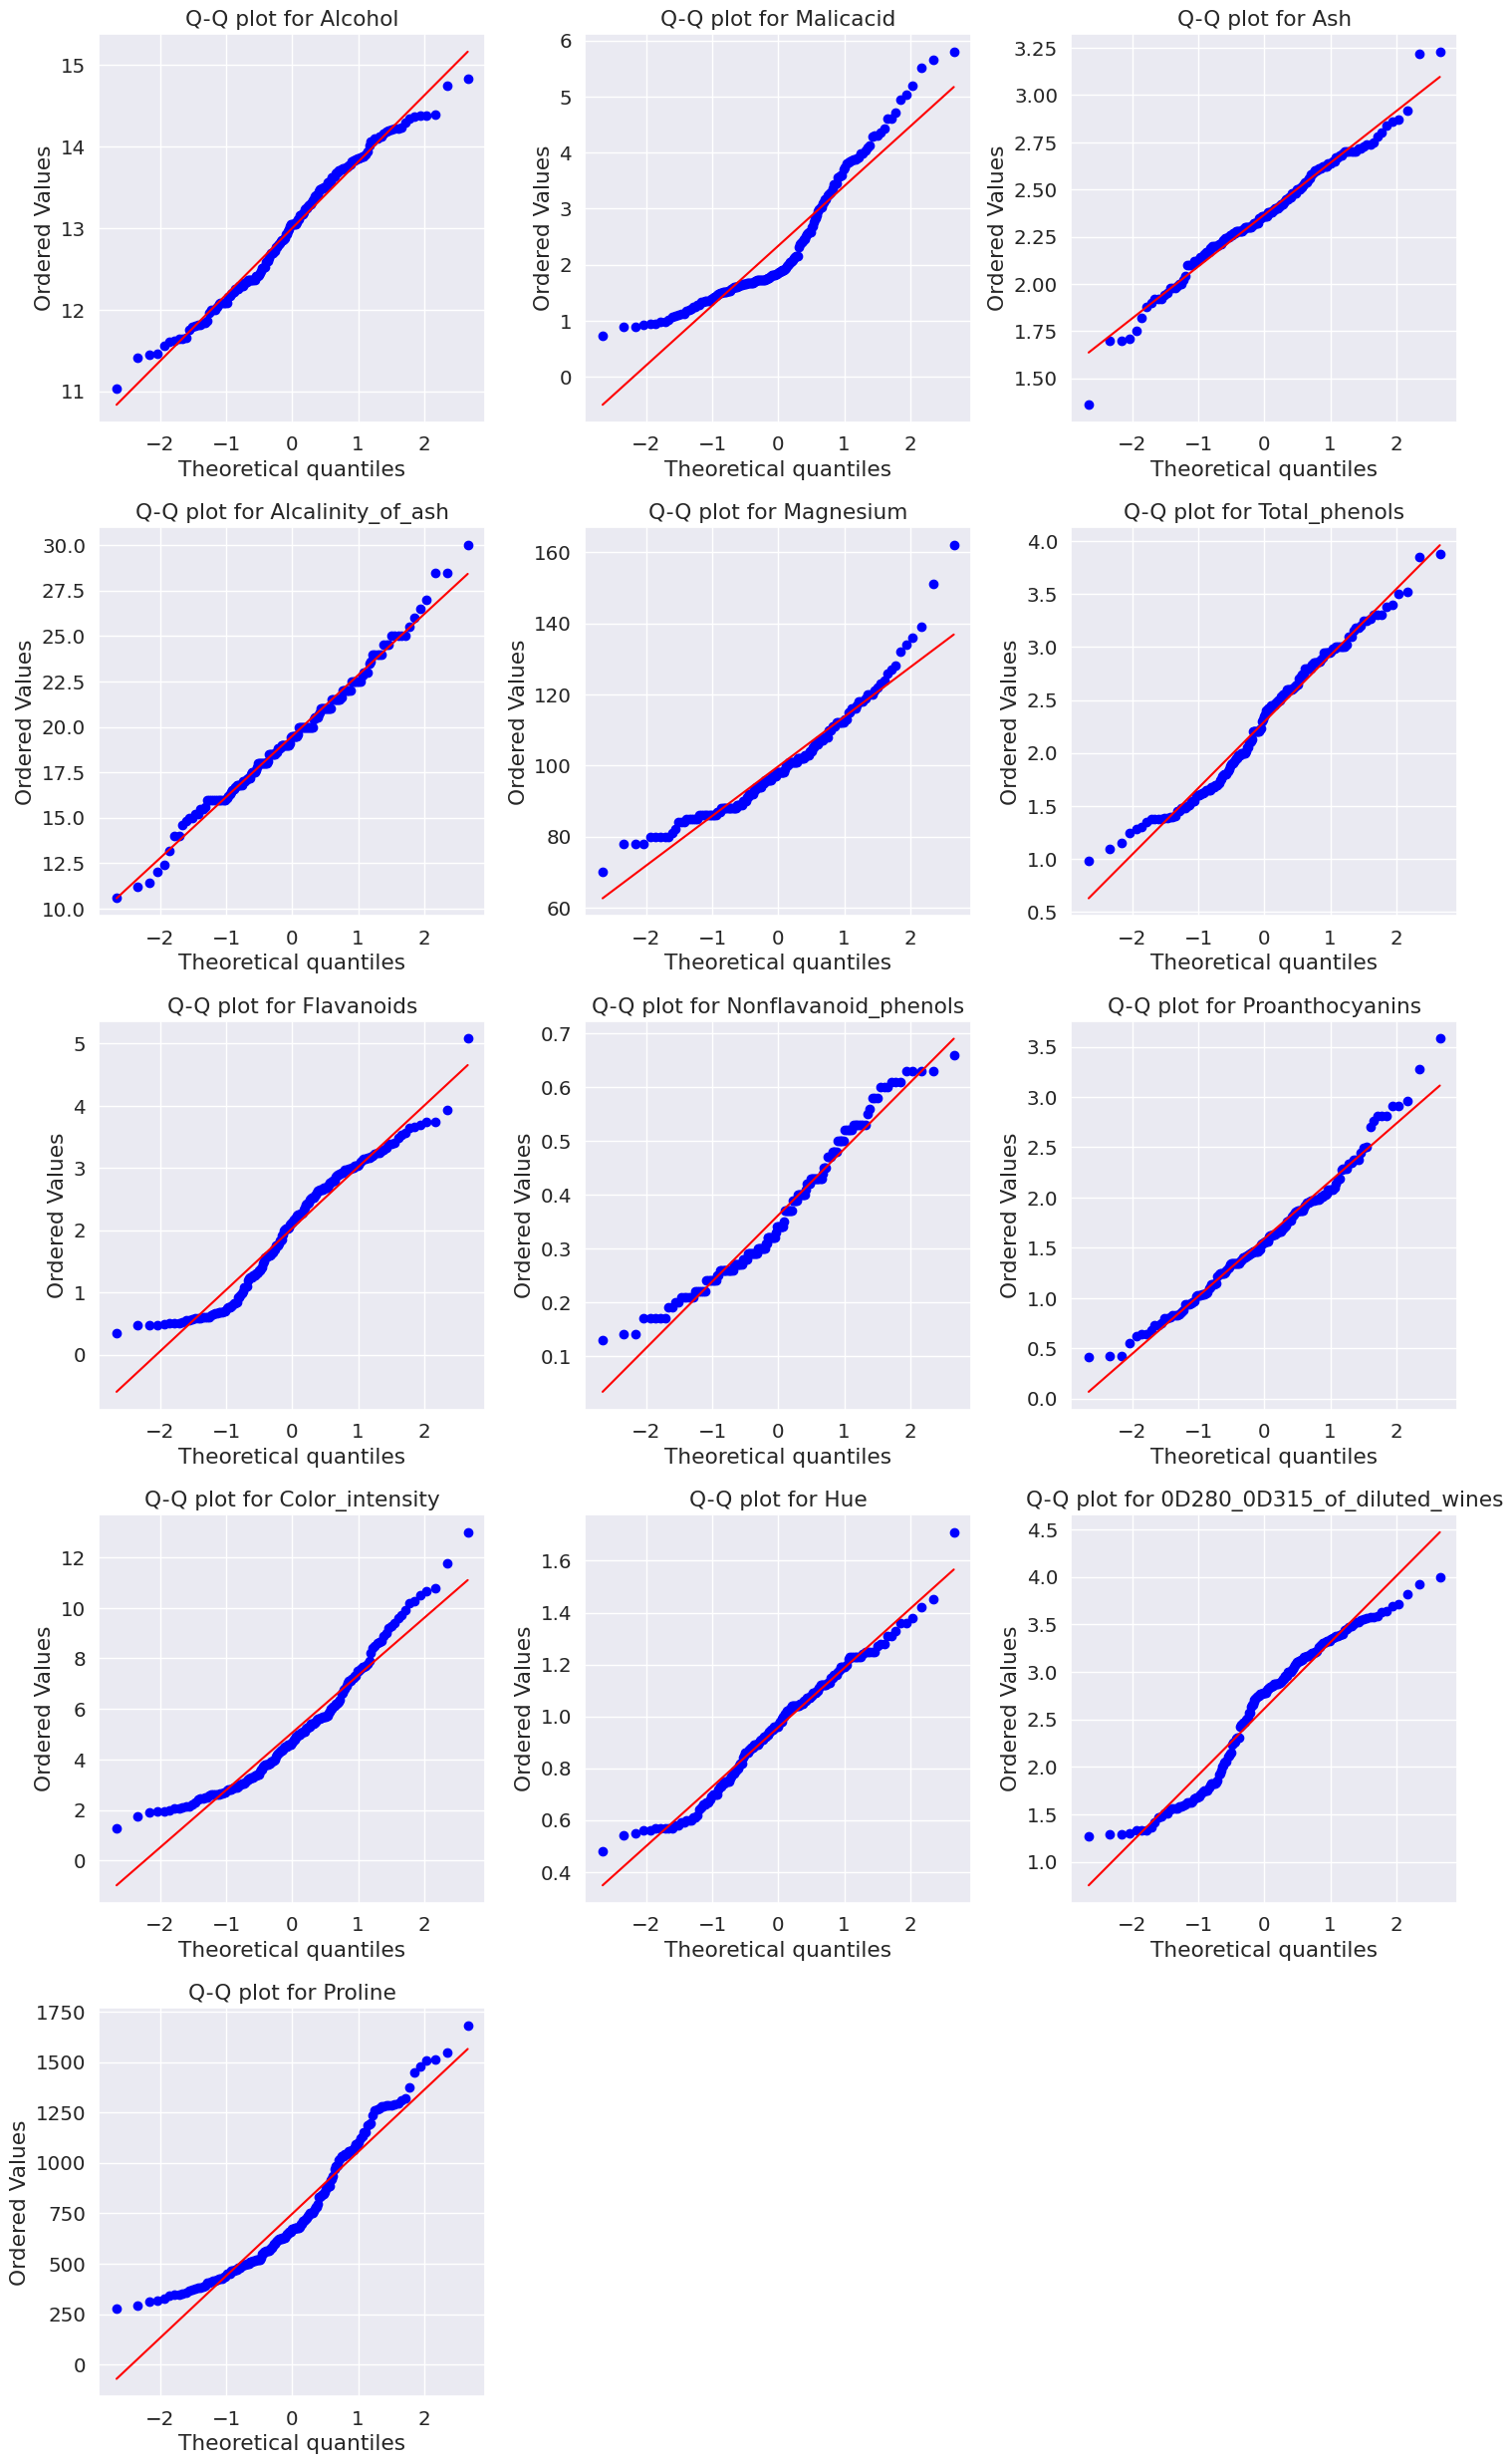

In [11]:
num_plots = X.shape[1]
cols = 3
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))
for i, feature in enumerate(X.columns):
    plt.subplot(rows, cols, i + 1)
    sps.probplot(X[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {feature}")

plt.tight_layout()
plt.show()

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:**

Для тех признаков, которые хорошо ложатся на прямую (за счет похожести ЭФР на ЭФР нормального распределения). Она не обязательно должна быть прямой пропорциальностью $y = x$, но в общем случае $y = ax + b$ - за счет сдвига и растяжения.

Под это подходят: Alcohol, Ash, Alcalinity_of_Ash, Total_phenois, Nonflavanoid_phenols, Proanthocyanis

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. Помочь в этом может теоретический материал и выполненные ранее задачи.

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

In [12]:
print(f"Размер выборки {len(X)}")

Размер выборки 178


**Ответ:** Выборка не слишком большая, буду использовать Жарка-Бера и Шапиро-Уилка 

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** Если делать разные множественные процедуры проверок гипотез то у нас вырастет ошибка и само преимущество МПГ пропадет. Действительно, например, мы можем начать отвергать нормальность Hue **если хотя бы одна** МПГ её отвергнет - а мы умеем контролировать **вероятности отторжения (точнее FWER, FDR) при фиксированной МПГ** 

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Мы не хотим сильно терять в мощности (у нас гипотез много), метод Бонферрони не подойдет. Берем метод Холма

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** 
Сравниваем скорректированные p-value с уровнем доверия $\alpha=0.05$ - если меньше, то отклоняем нормальность

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:**
Наш критерий не может различить (с достаточной уверенностью) данную выборку от нормальной; те свойства нормального распределения, которые проверяет критерий, выполняются

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу.

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [13]:
normality_tests = {
    "Шапиро-Уилк": sps.shapiro,
    "Жрако-Бера": sps.jarque_bera
}

p_values = {test_name: [] for test_name in normality_tests.keys()}

for feature in X.columns:
    for test_name, test_func in normality_tests.items():
        stat, p_value = test_func(X[feature])
        p_values[test_name].append(p_value)

corrected_pvalues = {}
for test_name, p_val in p_values.items():
    test_name = 'p val ' + test_name
    _, corrected_pvalues[test_name], _, _ = multipletests(p_val, method='holm')
    corrected_pvalues[test_name] = np.round(corrected_pvalues[test_name], 5)

results_df = pd.DataFrame(corrected_pvalues, index=X.columns)

for test_name in normality_tests.keys():
    results_df[f'Отторгаем ({test_name})'] = results_df['p val ' + test_name] < 0.05

results_df

,p val Шапиро-Уилк,p val Жрако-Бера,Отторгаем (Шапиро-Уилк),Отторгаем (Жрако-Бера)
Alcohol,0.07227,0.26366,False,False
Malicacid,0.00000,0.00000,True,True
Ash,0.07737,0.06273,False,False
Alcalinity_of_ash,0.26387,0.50187,False,False
Magnesium,0.00001,0.00000,True,True
Total_phenols,0.02637,0.26366,True,False
Flavanoids,0.00013,0.26366,True,False
Nonflavanoid_phenols,0.00074,0.06428,True,False
Proanthocyanins,0.07227,0.06273,False,False
Color_intensity,0.00001,0.00012,True,True


Для каких признаков нормальность не отвергается?

**Ответ:** 

Не отторгается методом Жарко-Бера:
Alcohol, Ash, Alcalinity_of_ash, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Hue

Дополнительно отторгается из них Шапиро-Уиолком:
Total_phenols, Flavanoids, Nonflavanoid_phenols

**Вывод:**
Для признаков, где результаты тестов различаются (например, Flavanoids), можно применить дополнительные методы для проверки распределения - можно посмотреть на QQ plot и увидеть, что там действительно есть проблемы в хвостах. А в Total_phenols есть хвост только слева.

Если методы, использующиеся в предположении нормальности выборки (в нашей конкретной задаче) чувствительны к выбросам, то стоит делать дополнительный отсвев признаков методом Шапиро-Уиолком. Если метод устойчив к отклонениям, достаточно посмотреть на QQ-plot (результат в целом согласуется с Жарко-Бером)

---
### Задача P4.

Исследуем влияние методов коррекции при множественной проверке гипотез на различные показатели качества.

**Теоретическая справка**

Приведем определения всех составляющих:
* $V_{\mathsf{P} S}(X)$ &mdash; количество верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $R_S(X)$ &mdash; количество отвергнутых гипотез критерием $S$ по выборке $X$,
* $U_{\mathsf{P} S}(X)$ &mdash; количество *не*верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $T_{\mathsf{P}}$ &mdash; количество *не*верных гипотез для $\mathsf{P}$.

Тогда характеристики определяются следующим образом.
* Вероятность хотя бы одного неверного отвержения
$$FWER = \mathsf{P}(V_{\mathsf{P} S}(X) > 0).$$

* Ожидаемая доля ложных отклонений среди всех отвергнутых гипотез
$$FDR = \mathsf{E}_\mathsf{P} \frac{V_{\mathsf{P} S}\;(X)}{\max(R_S(X), 1)}.$$

* Ожидаемая доля правильный отклонений среди всех неверных гипотез
$$Power = \mathsf{E}_\mathsf{P} \frac{U_{\mathsf{P} S}\;(X)}{\max(T_{\mathsf{P}}, 1)}.$$

**Постановка задачи**

Дана выборка $X = (X_1, ..., X_n)$ из многомерного нормального распределения с неизвестным вектором средних ${\theta}$ и известной матрицей ковариаций ${\Sigma}$.
Для каждой из компонент вектора проверяется гипотеза $\mathsf{H}_j\colon\ \theta_j = 0$ против правосторонней альтернативы. Соответственно, используется правосторонний критерий на основе выборочного среднего, который является при этом равномерно наиболее мощным.


*Задача*: исследовать, как ведут себя характеристики процедур МПГ в зависимости от
1. количества верных гипотез,
2. используемой процедуры МПГ,
3. степени скоррелированности компонент.

*Пояснения по каждому пункту.*

1. Для упрощения задачи будем рассматривать простую альтернативную гипотезу $\mathsf{H}'_j\colon\ \theta_j = \theta_{1j}$, где $\theta_{1j} > 0$ &mdash; фиксированное положительное число. На самом деле конкретный выбор $\theta_{1j}$ влияет только на масштаб. Тем самым мы концентрируемся на верности/неверности гипотезы, а не на конкретных распределениях их альтернативы.


2. Исследуемые методы корректировки:
    * отсутствие корректировки,
    * метод Бонферрони,
    * метод Холма,
    * метод Бенджамини-Иекутиелли.
    
*Можно также исследовать только часть методов и получить за это часть баллов.*


3. Для исследования степени скоррелированности будем рассматривать такие матрицы ковариаций ${\Sigma}$, у которых на диагонали стоит 1, а вне диагонали &mdash; число $\gamma \in [0, 1]$, отвечающее за корреляцию выборок. Напомним, при $\gamma=0$ выборки независимы, а при $\gamma=1$ выборки идентичны. Соответственно, в процессе исследования изучим поведение характеристик для независимых, зависимых, идентичных выборок.



**Исследование**

Для проведения исследования вам нужно реализовать примерно следующую процедуру.
* перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
    * перебираем все комбинации верных/неверных гипотез
        * совершаем достаточно много итераций метода Монте-Карло
            * генерируем выборку
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
        * оцениваем FWER, FDR, Power
        

Поскольку с помощью Монте-Карло мы оцениваем разные величины, *для ускорения процедуры и получения менее шумных графиков* можно использовать одинаковые семплы для разных процедур. Тем самым схема получается следующая
* совершаем достаточно много итераций метода Монте-Карло
    * генерируем выборку с независимыми компонентами
    * перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
        * меняем матрицу ковариаций (нужно домножить на корень из матрицы)
        * перебираем все комбинации верных/неверных гипотез
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
* оцениваем FWER, FDR, Power во всех случаях

*Вторая схема работает быстрее, но немного сложнее в реализации. <u>Вы можете реализовать любую схему.</u>*


**Рекомендации и замечания:**
* для ускорения вычислений реализуйте критерий, принимающий выборку векторов, и использующий усреднение по указанной оси;
* реализацию метода Бонферонни можно взять из `statsmodels`, она работает достаточно быстро;
* реализацию методов Холма и Бенджамини-Иекутиелли тоже можно взять из `statsmodels`, но они работают существенно дольше;
* эти методы можно реализовать самостоятельно без циклов, причем возвращать достаточно *только вектор результатов* (1 &mdash; гипотеза отвергается, 0 &mdash; не отвергается), скорректированные p-value для исследования вычислять не требуется;
* при реализации методов помогут функции `np.argsort` для пересортировки гипотез и `np.cumprod` для бинарного массива с целью выполнения нисходящей/восходящей процедуры.

Возьмем следующие параметра эксперимента

In [14]:
import itertools
sample_size = 100  # размер выборки на каждой итерации
n_iters = int(5e2)  # число экспериментов для каждой конфигурации
alpha = 0.05  # уровень значимости

theta_1 = 0.25  # значение из альтернативной гипотезы
n_hypothesis = 3  # количество гипотез

# Список всех комбинаций верных и неверных гипотез
hypothesis_mask_list = np.array(list(itertools.product([0, 1], repeat=n_hypothesis)))
print(hypothesis_mask_list)

# Перебираемые значения корреляции
n_correlations = 11
correlations_list = np.linspace(0, 1, n_correlations)
print(correlations_list)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Методы коррекции

In [15]:
correction_methods = {
    'None': lambda p: p,
    'Bonferroni': lambda p: multipletests(p, alpha=alpha, method='bonferroni')[1],
    'Holm': lambda p: multipletests(p, alpha=alpha, method='holm')[1],
    'Benjamini-Yekutieli': lambda p: multipletests(p, alpha=alpha, method='fdr_by')[1]
}

Подсчет

In [ ]:
methods = ['None', 'Bonferroni', 'Holm', 'Benjamini-Yekutieli']

results = {method: [] for method in methods}

for gamma in tqdm(correlations_list):
    for hypothesis_mask in tqdm(hypothesis_mask_list):
        
        V_all = {method: [] for method in methods}
        R_all = {method: [] for method in methods}
        U_all = {method: [] for method in methods}
        T_all = {method: [] for method in methods}
        
        for _ in range(n_iters):
            corr_matrix = np.full((n_hypothesis, n_hypothesis), gamma)
            np.fill_diagonal(corr_matrix, 1)
            X = np.random.multivariate_normal(np.zeros(n_hypothesis), corr_matrix, size=sample_size)
            
            for j in range(n_hypothesis):
                if hypothesis_mask[j] == 1:
                    X[:, j] += theta_1

            means = np.mean(X, axis=0)
            p_values = 1 - sps.norm.cdf(means / (np.std(X, axis=0) / np.sqrt(sample_size)))

            for correction_name in methods:
                if correction_name == 'None':
                    corrected_pvalues = p_values
                elif correction_name == 'Bonferroni':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='bonferroni')[1]
                elif correction_name == 'Holm':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='holm')[1]
                elif correction_name == 'Benjamini-Yekutieli':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='fdr_by')[1]

                # Верные гипотезы, которые были ошибочно отвергнуты
                V = np.sum((corrected_pvalues <= alpha) & (hypothesis_mask == 0))  

                # Все отвергнутые гипотезы
                R = np.sum(corrected_pvalues <= alpha)

                # Неверные гипотезы, которые были отвергнуты
                U = np.sum((corrected_pvalues <= alpha) & (~hypothesis_mask))

                # Все неверные гипотезы
                T = np.sum(hypothesis_mask == 1)

                V_all[correction_name].append(V)
                R_all[correction_name].append(R)
                U_all[correction_name].append(U)
                T_all[correction_name].append(T)

        for method in methods:
            fwer_mean = np.mean(np.array(V_all[method]) > 0)
            fdr_mean = np.mean(np.array(V_all[method]) / np.maximum(R_all[method], 1))
            power_mean = np.mean(np.array(U_all[method]) / np.maximum(np.array(T_all[method]), 1))

            results[method].append([fwer_mean, fdr_mean, power_mean])

Для каждой характеристики постройте графики, используя сетку, например $2 \times 4$. На каждом графике для определенной комбинации верности гипотез постройте график это характеристики в зависимости от значения корреляции $\gamma$ для всех методов корректировки МПГ. Для FWER и FDR отметьте также уровень $\alpha=0.05$

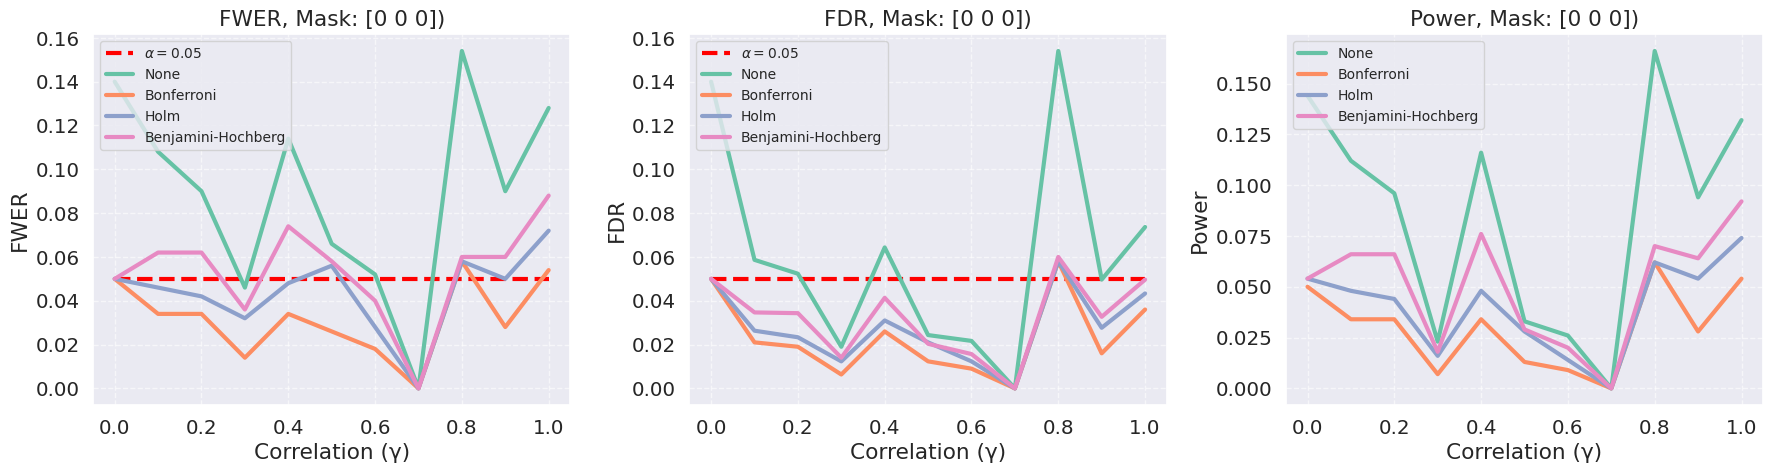

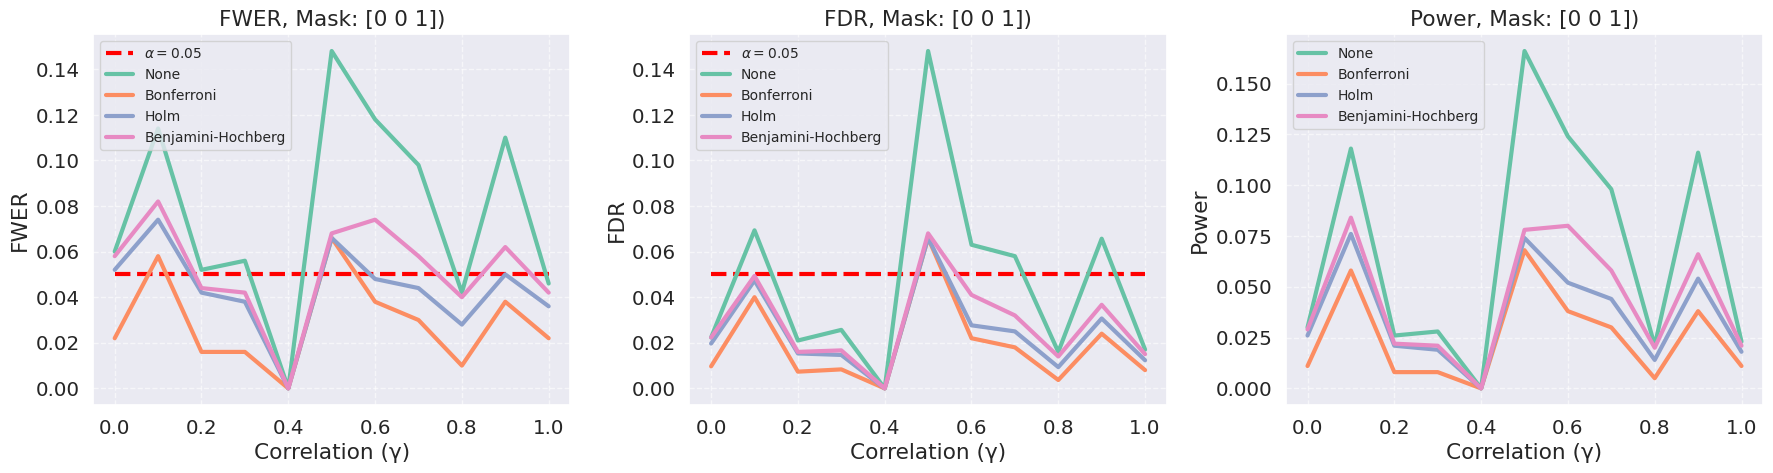

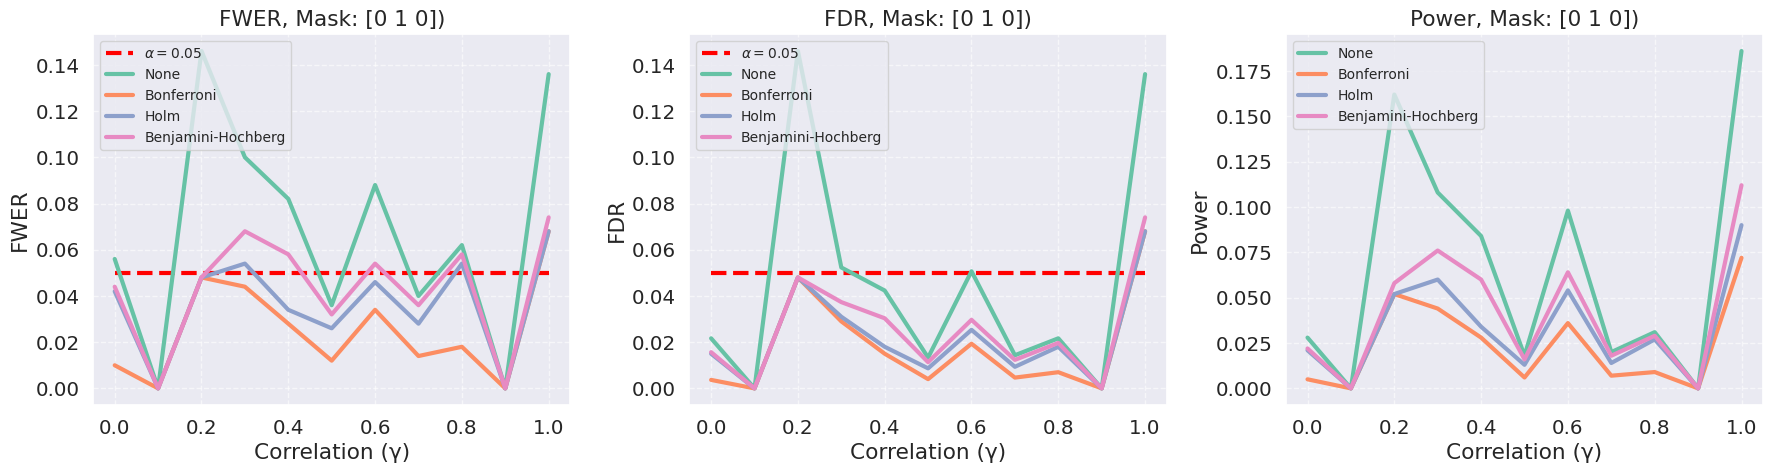

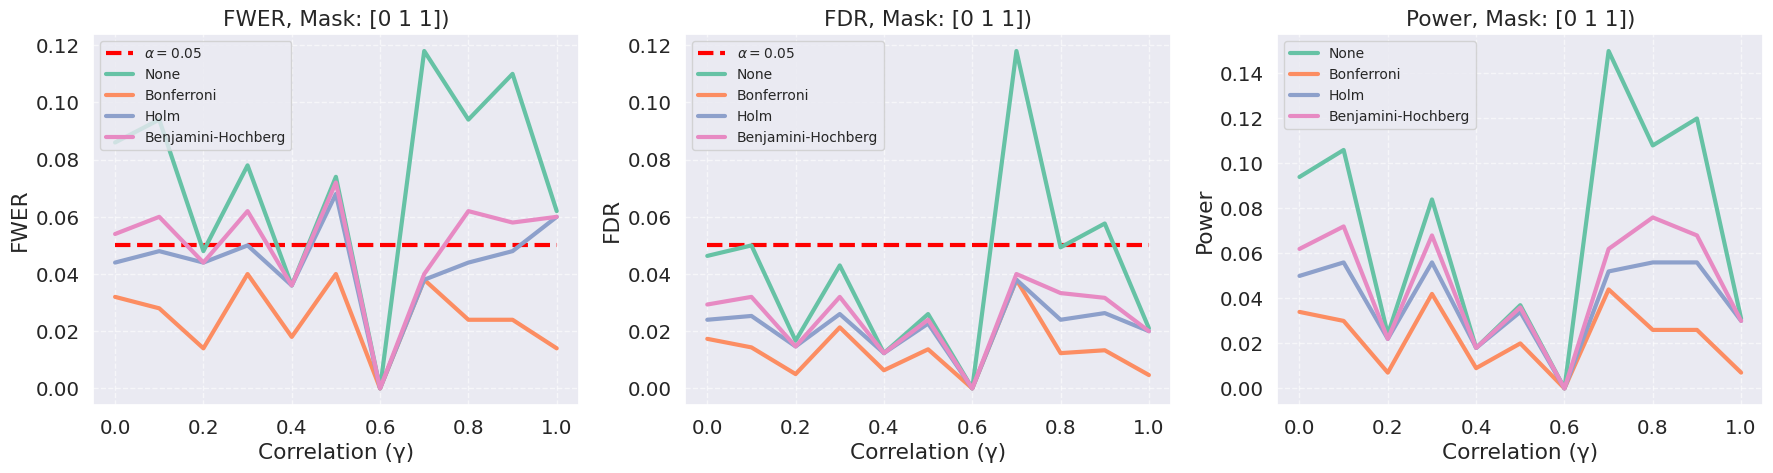

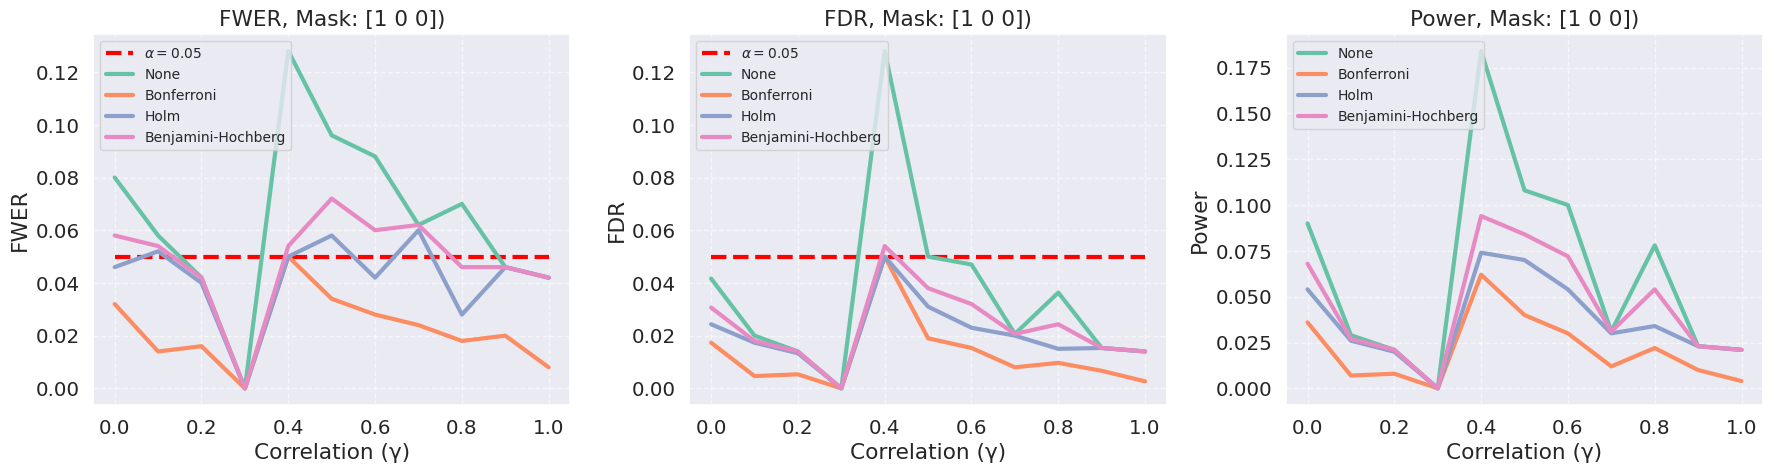

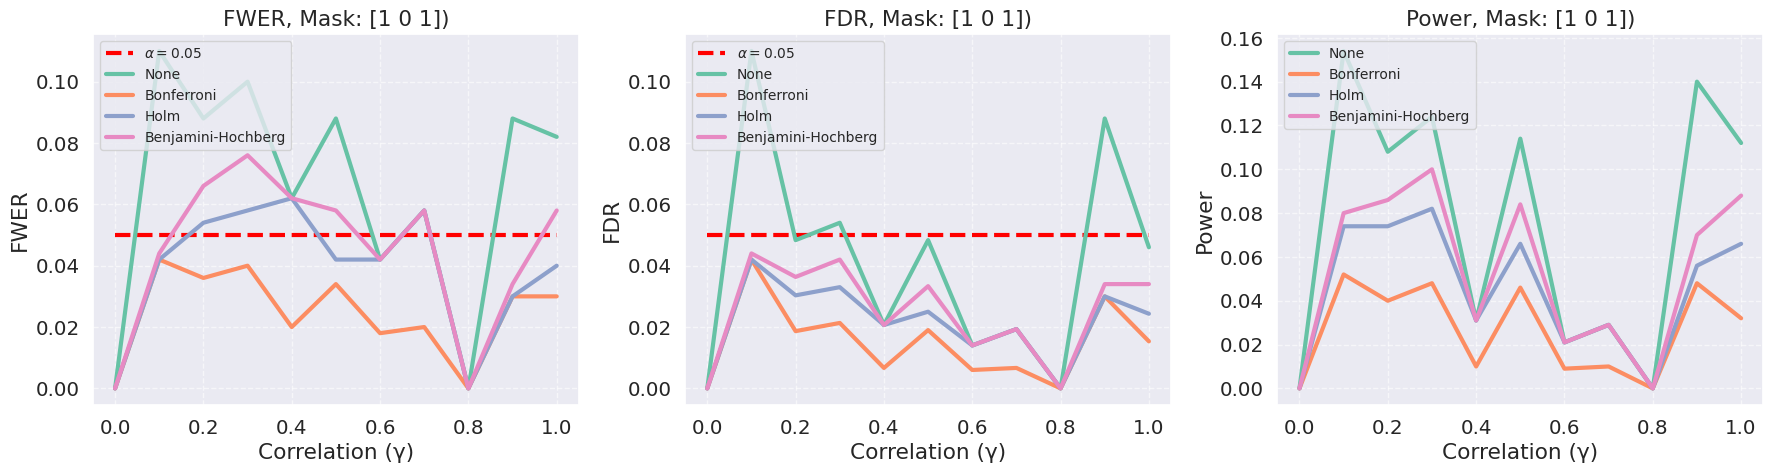

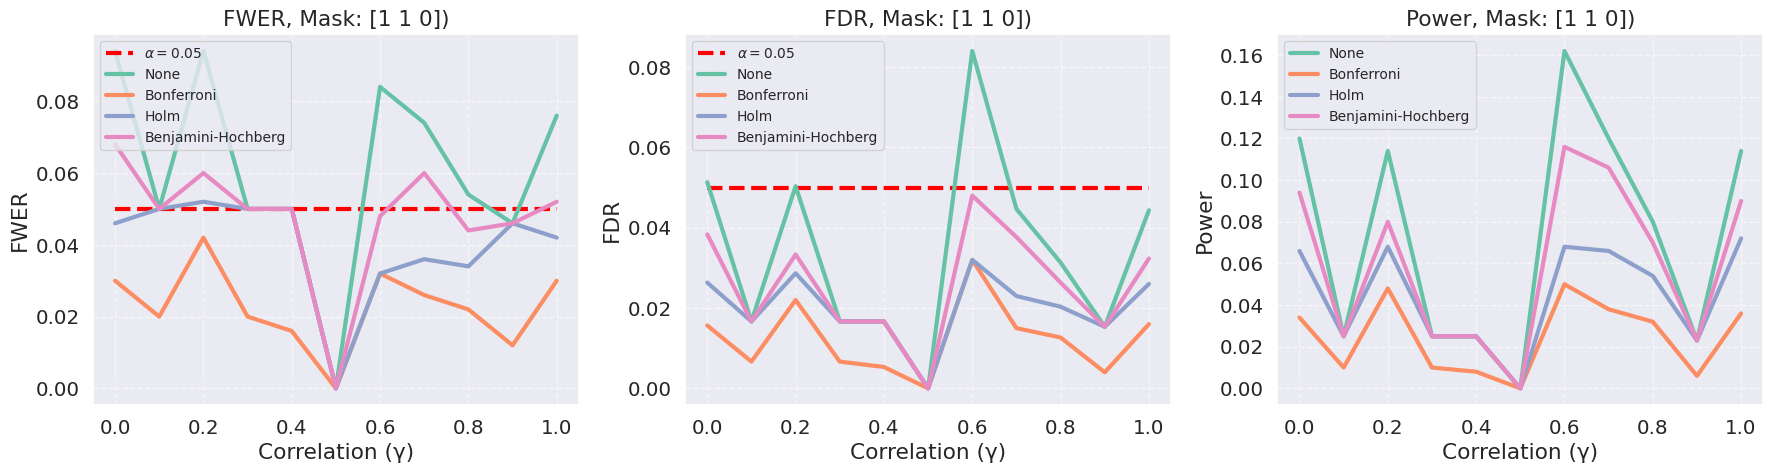

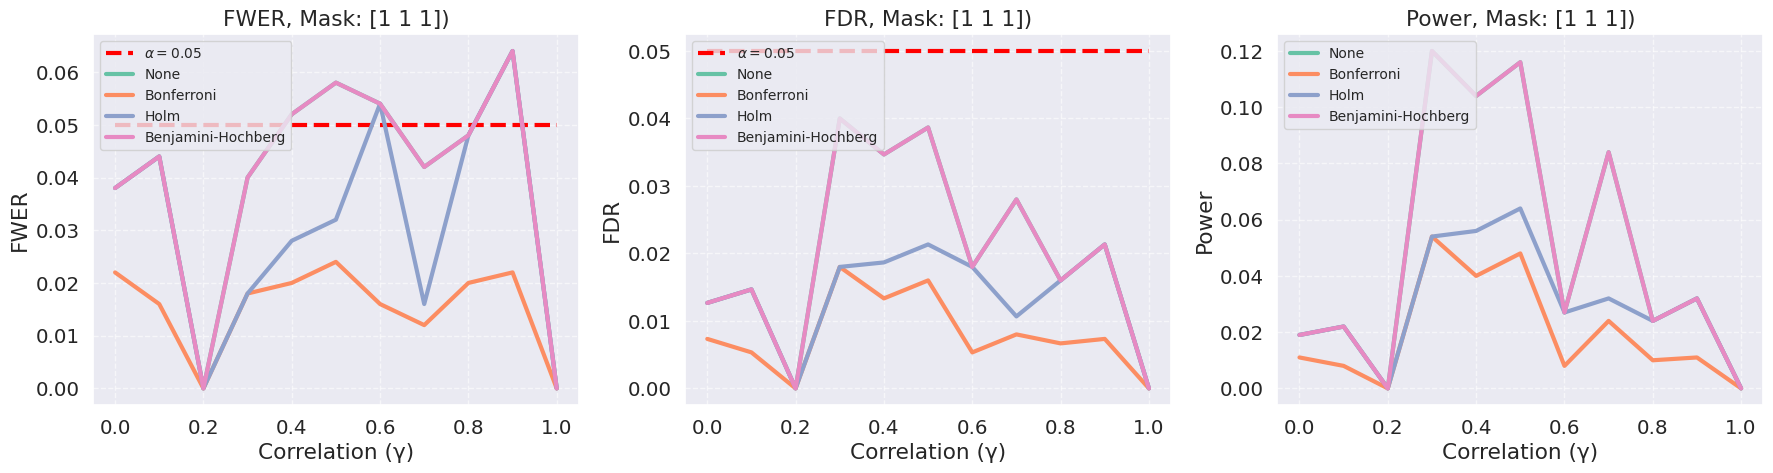

In [17]:
methods = ['None', 'Bonferroni', 'Holm', 'Benjamini-Yekutieli']
metrics = ["FWER", "FDR", "Power"]

for mask_index, hypothesis_mask in enumerate(hypothesis_mask_list):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for metric_index, metric in enumerate(metrics):
        ax = axes[metric_index]
        ax.set_title(f"{metric}, Mask: {hypothesis_mask})")

        if metric in ["FWER", "FDR"]:
            ax.hlines(alpha, 0, 1, color='red', lw=3, label=r"$\alpha=0.05$", linestyle="--")
        
        for correction_name in methods:
            if metric == "FWER":
                metric_values = [result[0] for result in results[correction_name]]
            elif metric == "FDR":
                metric_values = [result[1] for result in results[correction_name]]
            elif metric == "Power":
                metric_values = [result[2] for result in results[correction_name]]

            data = metric_values[mask_index * len(correlations_list):(mask_index + 1) * len(correlations_list)]
            
            ax.plot(
                correlations_list,
                data,
                lw=3,
                label=correction_name
            )
        
        ax.set_xlabel("Корреляция (γ)")
        ax.set_ylabel(metric)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=10, loc='upper left')

    plt.tight_layout()
    plt.show()

Проинтерпретируйте полученные результаты и сделайте выводы.

Проведите эксперименты для другого количества гипотез. При этом для ускорения можно перебирать не все комбинации гипотез, а только те, для которых результат будет отличаться. Какие именно &mdash; подумайте, проанализировав полученные выше графики.

Ясно, что если переставить местами гипотезы, то ничего не изменится

In [23]:
n_hypothesis = 5
hypothesis_mask_list = []

for k in range(1, n_hypothesis + 1):
    mask = [1] * k + [0] * (n_hypothesis - k)
    hypothesis_mask_list.append(mask)

print("Маски вида 1*0*:")
for mask in hypothesis_mask_list:
    print(mask)

hypothesis_mask_list = np.array(hypothesis_mask_list)

Маски вида 1*0*:
[1, 0, 0, 0, 0]
[1, 1, 0, 0, 0]
[1, 1, 1, 0, 0]
[1, 1, 1, 1, 0]
[1, 1, 1, 1, 1]


In [ ]:
methods = ['None', 'Bonferroni', 'Holm', 'Benjamini-Yekutieli']

results_second = {method: [] for method in methods}

for gamma in tqdm(correlations_list):
    for hypothesis_mask in tqdm(hypothesis_mask_list):
        
        V_all = {method: [] for method in methods}
        R_all = {method: [] for method in methods}
        U_all = {method: [] for method in methods}
        T_all = {method: [] for method in methods}
        
        for _ in range(n_iters):
            corr_matrix = np.full((n_hypothesis, n_hypothesis), gamma)
            np.fill_diagonal(corr_matrix, 1)
            X = np.random.multivariate_normal(np.zeros(n_hypothesis), corr_matrix, size=sample_size)
            
            for j in range(n_hypothesis):
                if hypothesis_mask[j] == 1:
                    X[:, j] += theta_1

            means = np.mean(X, axis=0)
            p_values = 1 - sps.norm.cdf(means / (np.std(X, axis=0) / np.sqrt(sample_size)))

            for correction_name in methods:
                if correction_name == 'None':
                    corrected_pvalues = p_values
                elif correction_name == 'Bonferroni':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='bonferroni')[1]
                elif correction_name == 'Holm':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='holm')[1]
                elif correction_name == 'Benjamini-Yekutieli':
                    corrected_pvalues = multipletests(p_values, alpha=alpha, method='fdr_bh')[1]

                # Верные гипотезы, которые были ошибочно отвергнуты
                V = np.sum((corrected_pvalues <= alpha) & (hypothesis_mask == 0))  

                # Все отвергнутые гипотезы
                R = np.sum(corrected_pvalues <= alpha)

                # Неверные гипотезы, которые были отвергнуты
                U = np.sum((corrected_pvalues <= alpha) & (~hypothesis_mask))

                # Все неверные гипотезы
                T = np.sum(hypothesis_mask == 1)

                V_all[correction_name].append(V)
                R_all[correction_name].append(R)
                U_all[correction_name].append(U)
                T_all[correction_name].append(T)

        for method in methods:
            fwer_mean = np.mean(np.array(V_all[method]) > 0)
            fdr_mean = np.mean(np.array(V_all[method]) / np.maximum(R_all[method], 1))
            power_mean = np.mean(np.array(U_all[method]) / np.maximum(np.array(T_all[method]), 1))

            results_second[method].append([fwer_mean, fdr_mean, power_mean])

И итого график

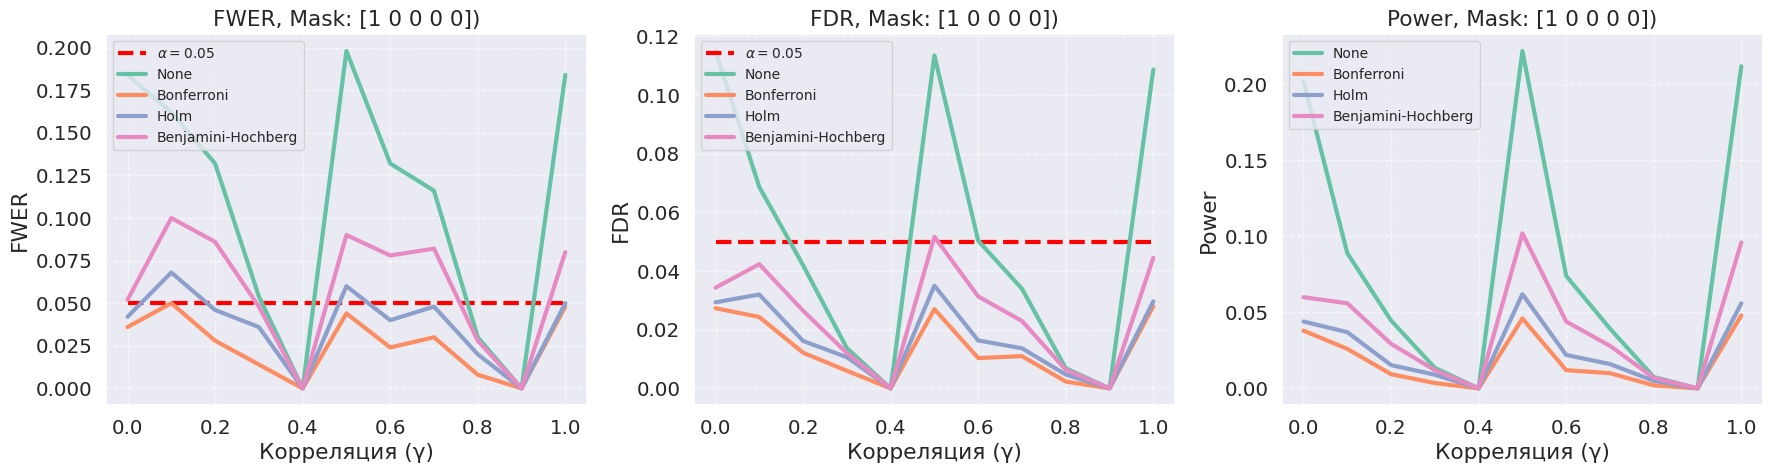

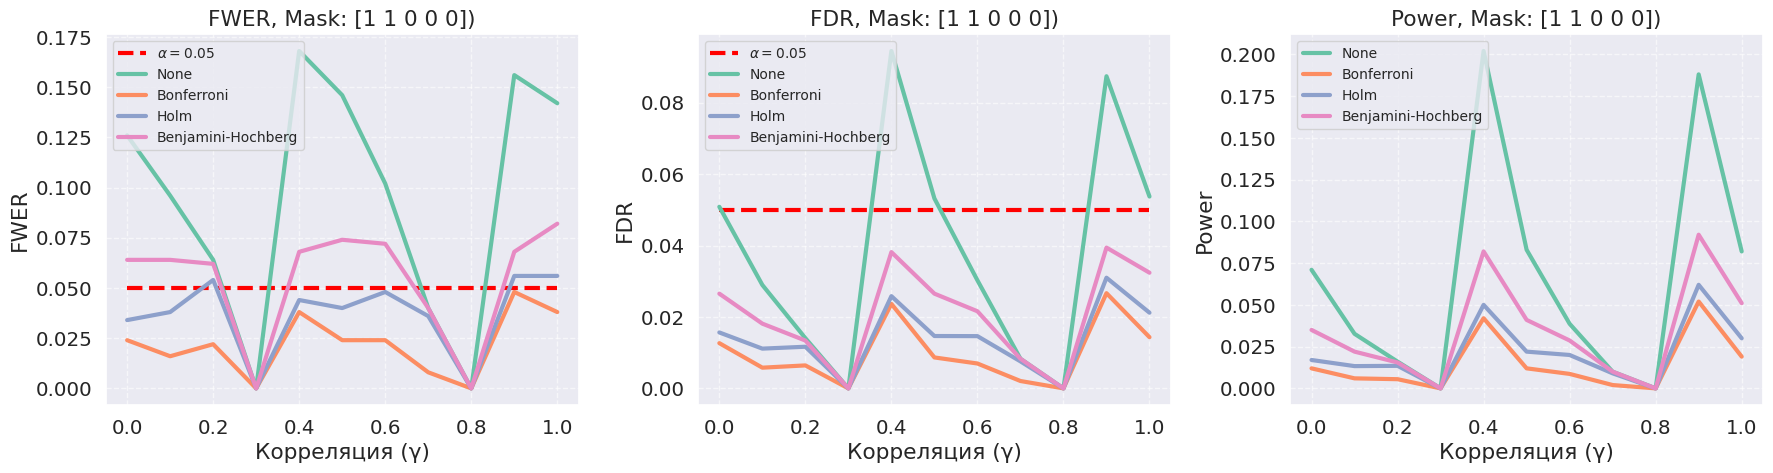

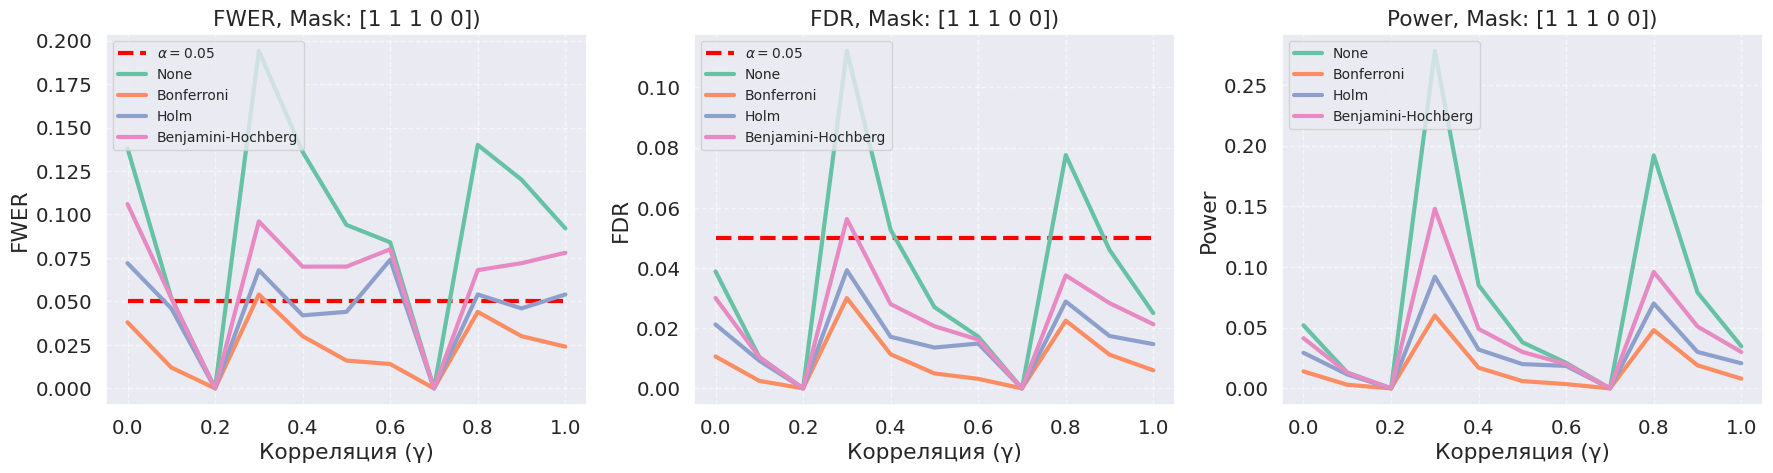

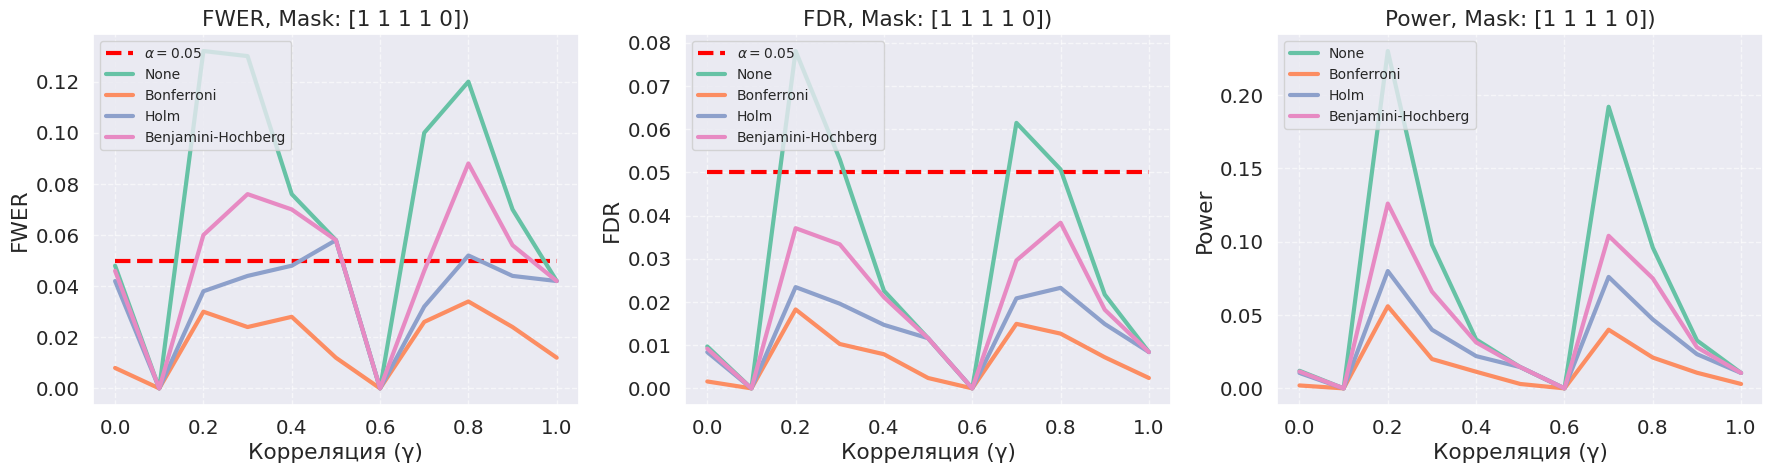

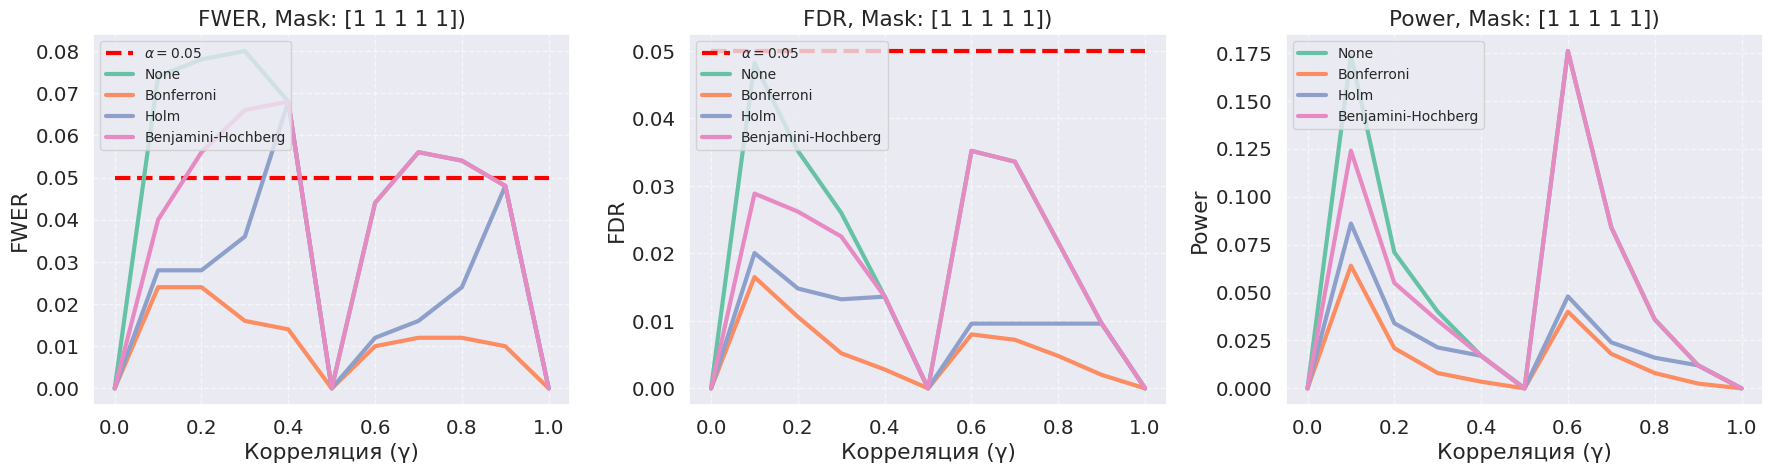

In [25]:
methods = ['None', 'Bonferroni', 'Holm', 'Benjamini-Yekutieli']
metrics = ["FWER", "FDR", "Power"]

for mask_index, hypothesis_mask in enumerate(hypothesis_mask_list):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for metric_index, metric in enumerate(metrics):
        ax = axes[metric_index]
        ax.set_title(f"{metric}, Mask: {hypothesis_mask})")

        if metric in ["FWER", "FDR"]:
            ax.hlines(alpha, 0, 1, color='red', lw=3, label=r"$\alpha=0.05$", linestyle="--")
        
        for correction_name in methods:
            if metric == "FWER":
                metric_values = [result[0] for result in results_second[correction_name]]
            elif metric == "FDR":
                metric_values = [result[1] for result in results_second[correction_name]]
            elif metric == "Power":
                metric_values = [result[2] for result in results_second[correction_name]]

            data = metric_values[mask_index * len(correlations_list):(mask_index + 1) * len(correlations_list)]
            
            ax.plot(
                correlations_list,
                data,
                lw=3,
                label=correction_name
            )
        
        ax.set_xlabel("Корреляция (γ)")
        ax.set_ylabel(metric)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=10, loc='upper left')

    plt.tight_layout()
    plt.show()

**Вывод**

1) Без коррекции: FWER превышает допустимый уровень значимости α, FDR тоже, причем тем сильнее, чем выше корреляция. Мощность высокая
2) Бонферони, Холм: контролируют FWER меньше α, FDR обычно не сильно превышает α; при высоких корреляциях FDR больше. Мощность наихудшая
3) Бенджамин-Иукутели: FWER превышает α, но есть контроль за FDR. Мощность компромисная

Методы, контролирующие FWER, предпочтительны, если необходимо избегать ложных положительных результатов (например недопустить одобрение неработающего медицинского препарата). Если это не так критично, то можно ограничить долю ложных открытий среди всех отвергнутых гипотез - за счет этого растет мощность метода. Без контроля сильно растет число ложных прокрасов, особенно если проверяемых гипотез много

